In [20]:
import script
import pandas as pd
from sklearn import linear_model
import requests
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import string 
df = script.df
data_frame = script.data_frame

In [2]:
df.shape #6335 rows and 3 columns 
df.drop_duplicates(inplace= True)
df.shape #6305 rows now after dropping duplicates

(6306, 3)

In [3]:
df.isnull().sum() #no missing values in columns

title    0
text     0
label    0
dtype: int64

In [4]:
df.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
nltk.download('stopwords') #useless words within data 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rosss\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
#remove useless words and text from data 
def process_text(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')] #return words not in stop words
    
    return clean_words

In [7]:
df['title'].head().apply(process_text) #useless words removed from title column of data set for first 5 entries 

0                             [Smell, Hillary’s, Fear]
1    [Watch, Exact, Moment, Paul, Ryan, Committed, ...
2                [Kerry, go, Paris, gesture, sympathy]
3    [Bernie, supporters, Twitter, erupt, anger, DN...
4                [Battle, New, York, Primary, Matters]
Name: title, dtype: object

In [8]:
from sklearn.feature_extraction.text import CountVectorizer #convert strings to integer counts
message_bow = CountVectorizer(analyzer=process_text).fit_transform(df['title'])

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, t_test = train_test_split(message_bow, df['label'], test_size=0.20,random_state=0)  #split data

In [10]:
message_bow.shape # each column is a different word tokenized 

(6306, 14944)

In [16]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train) #create and train naive classifier model

MultinomialNB()

In [17]:
print(classifier.predict(X_train))
print(y_train.values) #test to see first three and last three rows of classified data 

['REAL' 'FAKE' 'FAKE' ... 'REAL' 'FAKE' 'FAKE']
['REAL' 'FAKE' 'FAKE' ... 'FAKE' 'FAKE' 'FAKE']


In [18]:
from sklearn.metrics import classification_report
prediction = classifier.predict(X_train)
print(classification_report(y_train, prediction)) #classification report 

              precision    recall  f1-score   support

        FAKE       0.96      0.94      0.95      2513
        REAL       0.94      0.96      0.95      2531

    accuracy                           0.95      5044
   macro avg       0.95      0.95      0.95      5044
weighted avg       0.95      0.95      0.95      5044



In [24]:
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn import datasets
from IPython import display

Multinomial NB with TextBlob 0.47058823529411764


,-1,1,0,accuracy,macro avg,weighted avg
precision,0.833333,0.090909,0.454545,0.470588,0.459596,0.579323
recall,0.625000,0.200000,0.384615,0.470588,0.403205,0.470588
f1-score,0.714286,0.125000,0.416667,0.470588,0.418651,0.513831
support,16.000000,5.000000,13.000000,0.470588,34.000000,34.000000


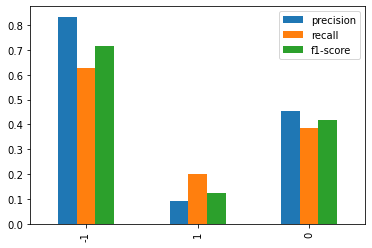

Multinomial NB with TextBlob 0.45454545454545453


,-1,1,0,accuracy,macro avg,weighted avg
precision,0.636364,0.090909,0.636364,0.454545,0.454545,0.586777
recall,0.538462,0.333333,0.411765,0.454545,0.427853,0.454545
f1-score,0.583333,0.142857,0.500000,0.454545,0.408730,0.500361
support,13.000000,3.000000,17.000000,0.454545,33.000000,33.000000


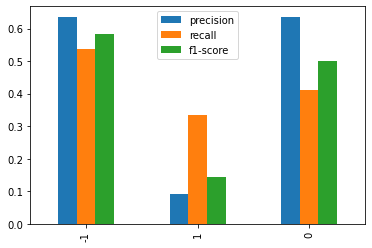

Multinomial NB with TextBlob 0.42424242424242425


,-1,1,0,accuracy,macro avg,weighted avg
precision,0.636364,0.300000,0.333333,0.424242,0.423232,0.421212
recall,0.636364,0.230769,0.444444,0.424242,0.437192,0.424242
f1-score,0.636364,0.260870,0.380952,0.424242,0.426062,0.418784
support,11.000000,13.000000,9.000000,0.424242,33.000000,33.000000


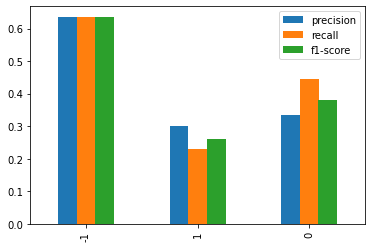

In [27]:
target = ['-1', '1', '0']
X, y = datasets.make_classification(n_classes=3, n_informative=5,)
X[X < 0] = 0
kf = model_selection.StratifiedKFold(n_splits=3)

for train_index, test_index in kf.split(X,y):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    clf = MultinomialNB().fit(X_train, y_train)

    y_score = clf.predict(X_test)
    print('Multinomial NB with TextBlob',accuracy_score(y_test,y_score))

    report1 = classification_report(y_score, y_test, target_names=target, digits=4,  output_dict=True)

    display.display(pd.DataFrame(report1))
    df = pd.DataFrame(report1)
    df.iloc[:3, :3].T.plot(kind='bar')
    plt.show()